In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
# Carregamento dos dados YOLO
diretorio_base = './base_folder'

#Arrays para armazenar as classes (labels) e as coordenadas (features)

labels = []
features = []

In [3]:
#Funcao para ler as linhas dos arquivos txt
def load_yolo_annotations(file_path):
    with open(file_path, 'r') as file:
        annotation_data = file.readlines()

    return annotation_data

#Funcao para, a partir das linhas lidas no txt, extrair as classes (1 elemento da linha) e as coordenadas (demais valores da linha)
def process_yolo_annotations(annotation_data):

    for annotation_line in annotation_data:
        # Divida a linha em itens
        items = annotation_line.strip().split()
            
        # A classe é o primeiro item
        class_label = int(items[0].split('.')[0])

        # As coordenadas são os itens restantes
        coordinates = [float(item) for item in items[1:]]

        # # Adicione a classe e as coordenadas aos arrays correspondentes
        labels.append(class_label)
        features.append(coordinates)
    return labels, features

In [4]:
#Laco para acessar todos os arquivos txt nas subpastas
for subpasta in ['Corte Teste', 'Corte Treino','Nao-Corte Teste','Nao-Corte Treino']:
    caminho_subpasta = os.path.join(diretorio_base, subpasta)

    for arquivo in os.listdir(caminho_subpasta):
        if arquivo.endswith('.txt'):  # ou o formato de imagem que você está usando
            caminho_txt = os.path.join(caminho_subpasta, arquivo)

            #Lê todas as linhas do arquivo txt
            annotation_data = load_yolo_annotations(caminho_txt)
            #Separa a classe das coordenadas
            txtLido = process_yolo_annotations(annotation_data)

In [5]:
# Converter 'features - coordenadas' para um array numpy
features = np.array(features)

# Divisão dos dados em conjuntos de treinamento e teste (30%/70% - seed 40)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=40)

# Criação e treinamento do modelo Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

# Realização de previsões no conjunto de teste
predictions = clf.predict(X_test)
y_test_pred = predictions

# Calcula a matriz de confusão
conf_matrix = confusion_matrix(Y_test, predictions)
# Calcula a matriz de confusão
accuracy = accuracy_score(Y_test, predictions)
# Calcula a matriz de confusão
f1 = f1_score(Y_test, predictions, average='weighted')
# Calcula a matriz de confusão
precision = precision_score(Y_test, y_test_pred, average='weighted')
# Calcula a matriz de confusão
Revocacao = recall_score(Y_test, y_test_pred, average='weighted')

print (predictions)
print(f'Acuracia do modelo: {accuracy}')
print(f'F1: {f1}')
print(f'Precisao: {precision}')
print(f'Revocacao: {Revocacao}')
print(f'Matriz de Confusão: {conf_matrix}')

[0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0
 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0
 1 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 

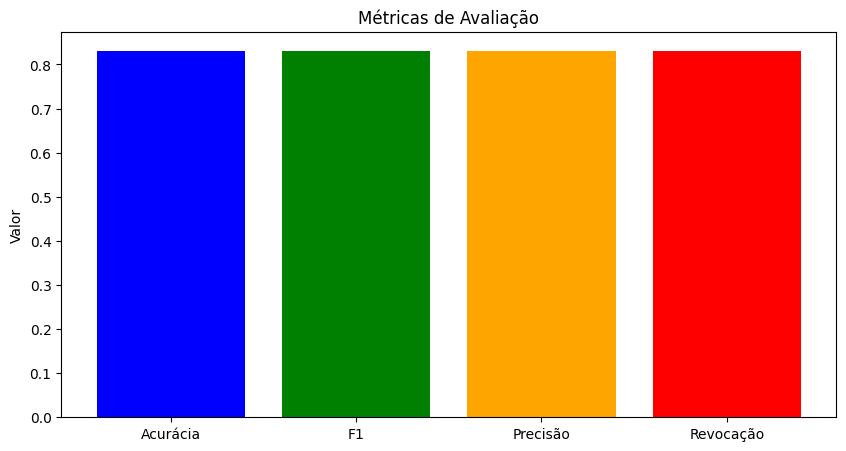

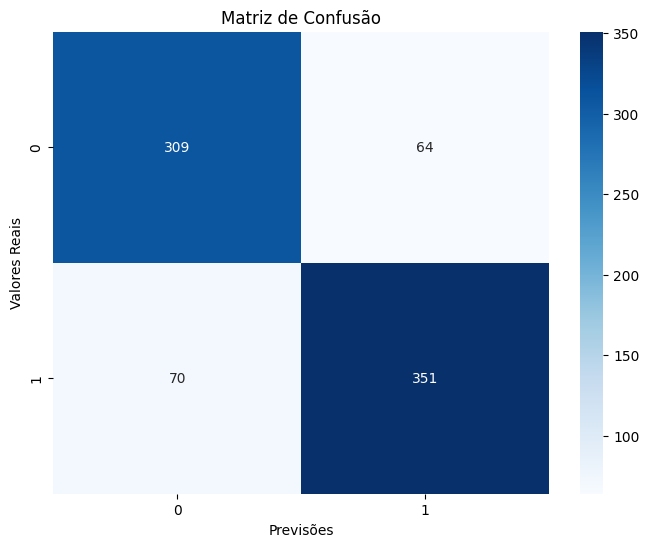

In [6]:
# Gráfico de barras para métricas de avaliação
metrics_names = ['Acurácia', 'F1', 'Precisão', 'Revocação']
metrics_values = [accuracy, f1, precision, Revocacao]

plt.figure(figsize=(10, 5))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Métricas de Avaliação')
plt.ylabel('Valor')
plt.show()

# Gráfico de matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Matriz de Confusão')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()